<a href="https://colab.research.google.com/github/MartinSomsak00/MLF/blob/main/LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [39]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1,1,0])


In [40]:
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [44]:
history = model.fit(X, Y, epochs=2000, batch_size=1, verbose=1)


Epoch 1/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4333 - loss: 0.8198     
Epoch 2/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3667 - loss: 0.8381     
Epoch 3/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4333 - loss: 0.7830     
Epoch 4/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3667 - loss: 0.7937     
Epoch 5/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3667 - loss: 0.7875     
Epoch 6/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3667 - loss: 0.7774     
Epoch 7/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4667 - loss: 0.6720 
Epoch 8/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1667 - loss: 0.7574     
Epoch 9/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6333 - loss: 0.6677 
Epoch 10/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6333 - loss: 0.7135
Epoch 11/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7333 - loss: 0.6581  
Epoch 12/2000
4/4 ━━━━━━━━━━━━━━━

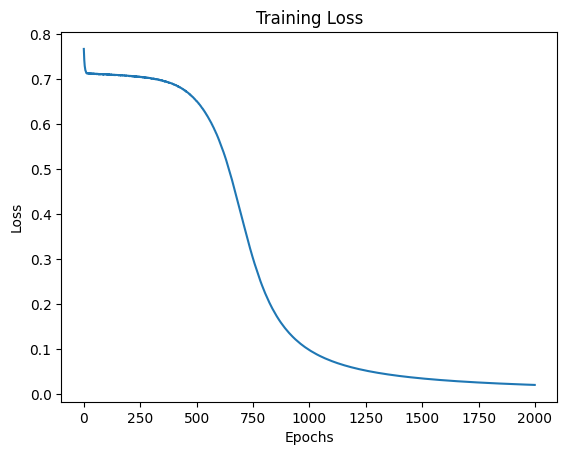

In [46]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [50]:
loss, accuracy = model.evaluate(X, Y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 100.00


In [54]:
for id_x, data_sample in enumerate(X):
    # Reshape data_sample to be a 2D array with one row
    data_sample = data_sample.reshape(1, -1)
    prediction = model.predict(data_sample)
    print(f"Data sample is {data_sample}, prediction from model {prediction}, ground truth {Y[id_x]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Data sample is [[0 0]], prediction from model [[0.02411812]], ground truth 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Data sample is [[0 1]], prediction from model [[0.98113424]], ground truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Data sample is [[1 0]], prediction from model [[0.98186773]], ground truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Data sample is [[1 1]], prediction from model [[0.02064377]], ground truth 0


Text(0, 0.5, 'loss')

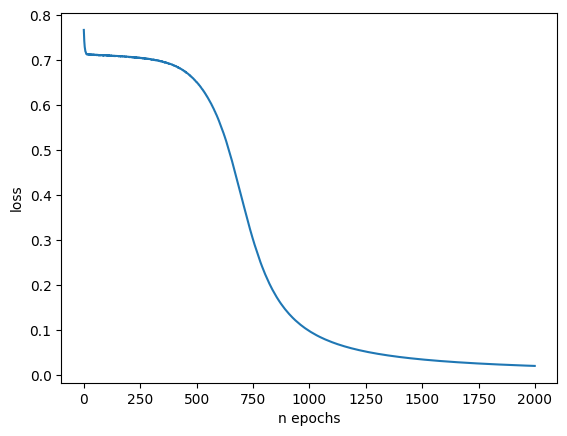

In [59]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

In [60]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [62]:
path_to_dataset = 'sample_data/voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

In [63]:

pd_dataset

,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [68]:

# define a function for train and test split

def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

In [69]:

x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

In [70]:
x_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
344,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
345,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
346,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the feature columns and target column
feature_columns = x_train.columns
target_column = 'Class Name'

# Preprocessing for the features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
            ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # One-hot encode and drop first category to avoid multicollinearity
        ]), feature_columns)
    ])

# Fit and transform the training data
x_train_preprocessed = preprocessor.fit_transform(x_train)

# Transform the test data using the same preprocessor
x_test_preprocessed = preprocessor.transform(x_test)

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Verify the shapes of the preprocessed data
print("Shape of x_train_preprocessed:", x_train_preprocessed.shape)
print("Shape of x_test_preprocessed:", x_test_preprocessed.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)


Shape of x_train_preprocessed: (348, 32)
Shape of x_test_preprocessed: (87, 32)
Shape of y_train_encoded: (348,)
Shape of y_test_encoded: (87,)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5133 - loss: 0.7157 - val_accuracy: 0.8714 - val_loss: 0.2896
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9295 - loss: 0.1900 - val_accuracy: 0.9143 - val_loss: 0.2079
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9452 - loss: 0.1167 - val_accuracy: 0.9286 - val_loss: 0.1840
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9615 - loss: 0.0924 - val_accuracy: 0.9143 - val_loss: 0.1674
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9731 - loss: 0.0600 - val_accuracy: 0.9286 - val_loss: 0.1786
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9806 - loss: 0.0575 - val_accuracy: 0.9286 - val_loss: 0.1742
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9716 - loss: 0.0755 - val_accuracy: 0.9286 - val_loss: 0.1780
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9819 - loss: 0.0500 - val_accuracy: 0.9143 - val_loss

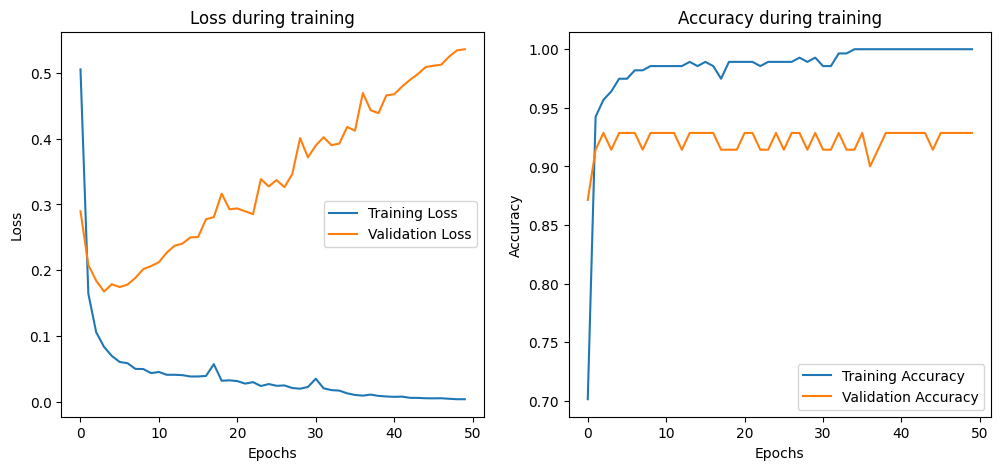

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Create the model
model = Sequential()
model.add(Dense(8, input_dim=x_train_preprocessed.shape[1], activation='relu'))  # Hidden layer with 10 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Print the model summary
model.summary()

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with validation split
history = model.fit(
    x_train_preprocessed, y_train_encoded,
    epochs=50,
    batch_size=10,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss during training')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy during training')

plt.show()


Test Accuracy: 97.70%
Test Loss: 0.1595


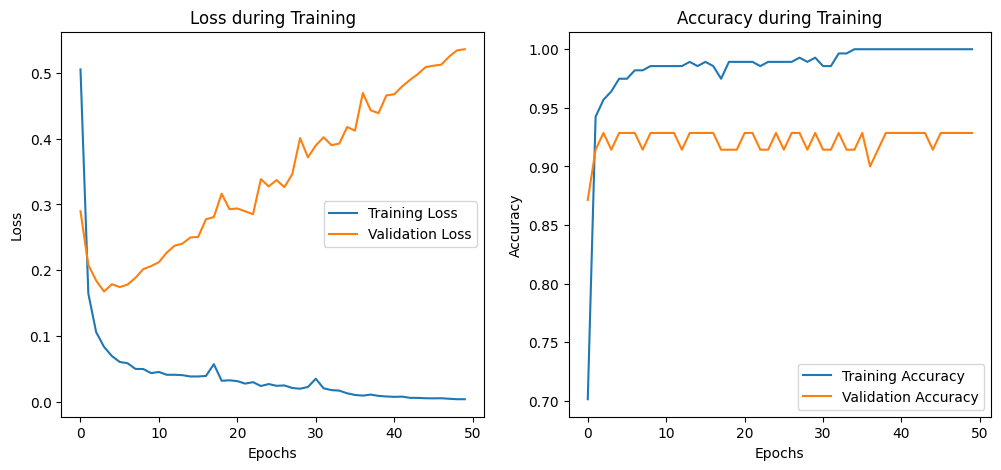

In [79]:
# Apply the same preprocessing to the test set
# Note: This step was already done in the previous preprocessing section
# x_test_preprocessed = preprocessor.transform(x_test)
# y_test_encoded = label_encoder.transform(y_test)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_preprocessed, y_test_encoded, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

# Plot training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss during Training')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy during Training')

plt.show()
